# ¿Qué es un árbol de decisión?

- Aprendizaje **supervisado**

- Aprendizaje basado en **modelos**

- Son **clasificadores no lineales**. Al contrario que la regersión lógistica o el algoritmo SVM, no construye los limites de decisión con lineas y planos rectos.

- Permiten la predicción de **valores continuos** (regresión) y de **valores discretos** (clasificación)

- Determina si un vector determinado pertenece a una clase o a otra estableciendo un **conjunto de reglas de decisión "if-the else"** que terminan en la predicción de una clase concreta

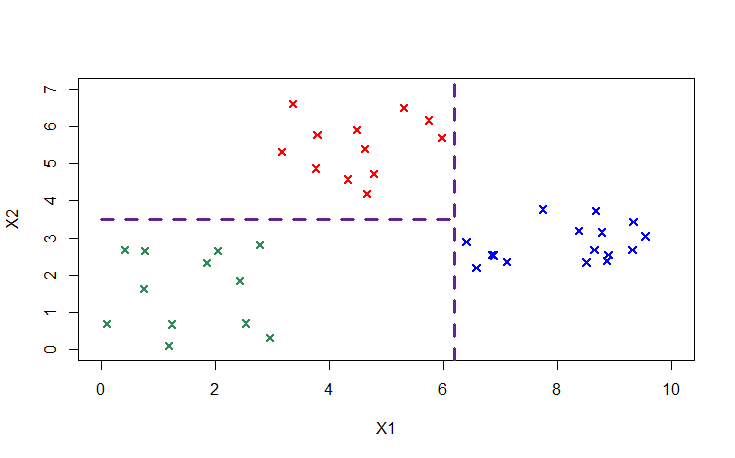

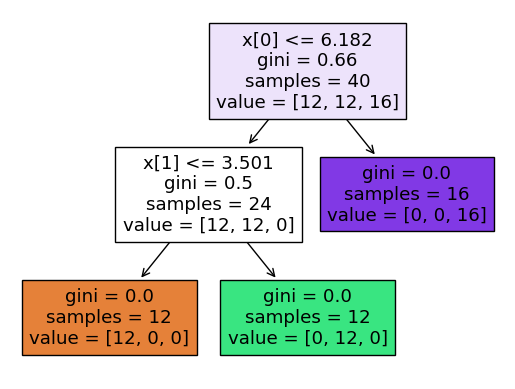

## Gini Impurity

Gini mide la frecuencia con la que un elemento de un conjunto elegido al azar se etiquetaría incorrectamente si se etiquetara al azar e independientemente de acuerdo con la distribución de etiquetas en el conjunto. Alcanza su mínimo (cero) cuando todos los casos en el nodo caen en una sola categoría objetivo.

Veamos su formulación
$$
G_i=1-\sum_{k=1}^np_{i,k}^2
$$

- $k$: cada una de las clases
- $i$: nodo del árbol
- $n$: Número de clases
- $p_{i,k}$: el ratio de ejemplos de la clase $k$ en el nodo $i$ 

**Ejemplo**: en el nodo 2 con [0,0,16], entonces
$$
G_2=1-(0/16)^2-(0/16)^2-(16/16)^2=0
$$
Si $G_i=0$, el error es 0, decimos que el nodo es completamente puro, una buena decisión.

Veamos en el nodo 3 con [12,12,0], luego
$$
G_3=1-(12/24)^2-(12/24)^2-(0/24)^2=0.5
$$

## Entrenamiento (I)

1. Analiza el conjunto de datos y selecciona la primera característica disponible para evaluarla como un **potencial punto de división** (split variable)

2. Examina el rango de valores asociados con esta característica y selecciona un **valor de división inicial** (split value)

3. **Copia los dos subconjuntos** de valores en los nodos 1 y 2 respectivamente

4. **Evalúa el resultado de la división** aplicando la métrica **Gini Impurity**

5. Se escoge el siguiente valor de división (split value) y se repite el proceso

## Entrenamiento (II)

- **Se selecciona la siguiente característica y se repiten los pasos 2 a 5**. Este proceso continua hasta que todas las características de un conjunto de datos y toso los valores de división haya sido evaluados

- El árbol selecciona el **par (característica, valor de división) que mejor valor de beneficio general produzca** y divide el conjunto de datos en dos nodos hijos

- Se realiza el mismo proceso para cada uno de los nuevos nodos hijos hasta que el árbol **se satura** (los nodos hijos pertenecen a una sola clase o se encuentra un criterio de detención)

- Si es necesario **el analista puede podar ramas del árbol** que no aportan mucho valor pero proporcionan complejidad computacional

## Classification and Regression Tree (CART)

- **Clasificación** y función de costo $J(k,t_k)$
$$
J(k,t_k)=\frac{m_{izq}}{m}\cdot G_{der}+\frac{m_{der}}{m}\cdot G_{der}
$$

$m$: número de ejemplos del conjunto de datos de entrenamiento

Ejemplo: $m=40$ y $n=3$

- **Regresión** y función de costo $J(k,t_k)$
$$
J(k,t_k)=\dfrac{m_{izq}}{m}\cdot MSE_{izq}+\dfrac{m_{der}}{m}\cdot MSE_{der}
$$

$MSE=\displaystyle\sum_{i=0}^{m_{nodo}}(\bar{y}_{nodo}-y_i)^2$

$\bar{y}_{node}=\dfrac{1}{m_{nodo}}\displaystyle\sum_{i=0}^{m_{nodo}}y_i$ promedio en el nodo

La principal implementación de árboles de decisión en **Python** está disponible en la librería `scikit-learn` a través de las clases `DecisionTreeClassifier` y `DecisionTreeRegressor`. Una característica importante para aquellos que han utilizado otras implementaciones es que, en `scikit-learn`, es necesario convertir las variables categóricas en variables dummy (one-hot-encoding).

## Limitaciones de los árboles de decisión

- La versión implementada en Scikit-learn puede producir árboles de decisión complejos que producen **Overfitting** sobre el conjunto de datos

- La implementación del algortimo, se basa en la **obtención de óptimos locales** entre el nodo padre y el nodo hijo. Como consecuencia, no hay manera de asegurar que el árbol a alcance una forma óptima global

- Los árboles de decisión **pueden ser inestables**. Una pequeña variación en el conjunto de datos puede producir que se genere un árbol completamente diferente

- Puede **mitigarse gran parte de los efectos** de estas limitaciones se utilizan conjuntos aleatorios de árboles que toman decisiones conjuntas (**Random Forest**)

## Overfitting

Lo árboles de decisión también puede producir *Overfitting*. Cuando existe un número elevado de características o de valores atípicos, es posible que el árbol de decisión genere un número muy elevado de ramas que desemboque en problemas para generalizar

Aplicar un **criterio de parada** (hiperparámetros):

- **max_depth**. Determina la cantidad máxima de ramas y hojas permitidas antes de que termine la construcción del árbol.

- **min_samples_split**. Determina el número mínimo de muestras que un nodo debe poseer para ser elegible para una división.

- ** min_samples_leaf**. Determina el número de muestras necesarias para crear una hoja secundaria.

- **max_leaf_nodes**. Determina cuántas hojas se pueden crear en total.

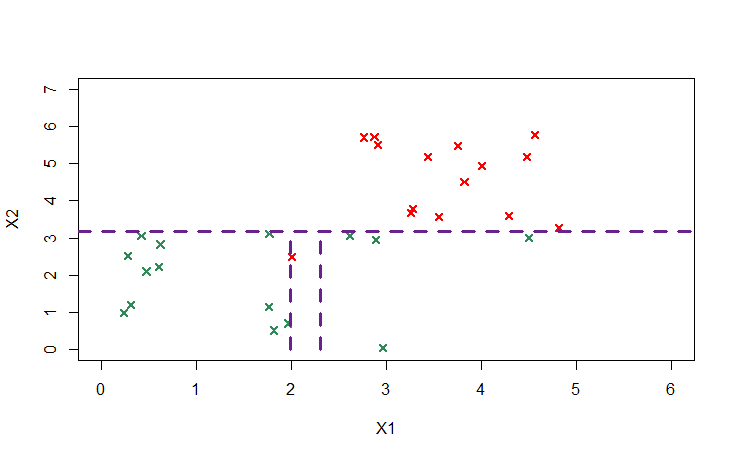

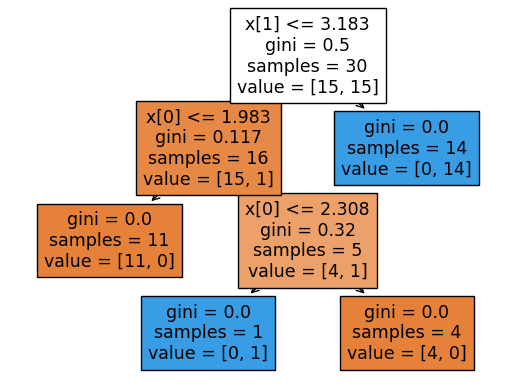

# Ejemplo de Regresión

El conjunto de datos contienen transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las características originales ni más información general sobre los datos. Las características V1, V2, … V28 son los principales componentes obtenidos con PCA, las únicas características que no han sido transformadas con PCA son 'Tiempo' y 'Cantidad'. La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La función 'Cantidad' es la cantidad de la transacción, esta función se puede utilizar para el aprendizaje sensible a los costos dependiente del ejemplo. Feature 'Class' es la variable de respuesta y toma valor 1 en caso de fraude y 0 en caso contrario.


## Importar librerias

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns

import copy

from matplotlib import pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
#Metricas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Funciones auxiliares

In [2]:
# Construcción de un pipeline para los atributos numéricos
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('rbst_scaler', RobustScaler()),
    ])

In [3]:
# Transormador para codificar únicamente las columnas categoricas y devolver un df
class CustomOneHotEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._oh = OneHotEncoder(sparse=False)
        self._columns = None
    def fit(self, X, y=None):
        X_cat = X.select_dtypes(include=['object'])
        self._columns = pd.get_dummies(X_cat).columns
        self._oh.fit(X_cat)
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_cat = X_copy.select_dtypes(include=['object'])
        X_num = X_copy.select_dtypes(exclude=['object'])
        X_cat_oh = self._oh.transform(X_cat)
        X_cat_oh = pd.DataFrame(X_cat_oh, 
                                columns=self._columns, 
                                index=X_copy.index)
        X_copy.drop(list(X_cat), axis=1, inplace=True)
        return X_copy.join(X_cat_oh)

In [4]:
# Transformador que prepara todo el conjunto de datos llamando pipelines y transformadores personalizados
class DataFramePreparer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self._full_pipeline = None
        self._columns = None
    def fit(self, X, y=None):
        num_attribs = list(X.select_dtypes(exclude=['object']))
        cat_attribs = list(X.select_dtypes(include=['object']))
        self._full_pipeline = ColumnTransformer([
                ("num", num_pipeline, num_attribs),
                ("cat", CustomOneHotEncoder(), cat_attribs),
        ])
        self._full_pipeline.fit(X)
        self._columns = pd.get_dummies(X).columns
        return self
    def transform(self, X, y=None):
        X_copy = X.copy()
        X_prep = self._full_pipeline.transform(X_copy)
        return pd.DataFrame(X_prep, 
                            columns=self._columns, 
                            index=X_copy.index)

## Cargar datos

In [5]:
dataset = pd.read_excel('SCFP2009panel.xlsx')

## Preparamos la variable de predicción

In [6]:
# Promedio SP500 durante el 2007 y 2009
Average_SP500_2007=1478
Average_SP500_2009=948

# Tolerancia al riesgo en 2007
dataset['RiskFree07']= dataset['LIQ07'] + dataset['CDS07'] + dataset['SAVBND07'] + dataset['CASHLI07']
dataset['Risky07'] = dataset['NMMF07'] + dataset['STOCKS07'] + dataset['BOND07'] 
dataset['RT07'] = dataset['Risky07']/(dataset['Risky07']+dataset['RiskFree07'])

# Tolerancia al riesgo en 2009
dataset['RiskFree09']= dataset['LIQ09'] + dataset['CDS09'] + dataset['SAVBND09'] + dataset['CASHLI09']
dataset['Risky09'] = dataset['NMMF09'] + dataset['STOCKS09'] + dataset['BOND09'] 
dataset['RT09'] = dataset['Risky09']/(dataset['Risky09']+dataset['RiskFree09'])*\
                (Average_SP500_2009/Average_SP500_2007)

Calculemos el cambio porcentual en la tolerancia al riesgo entre 2007 y 2009.

In [7]:
dataset2 = copy.deepcopy(dataset)
dataset2['PercentageChange'] = np.abs(dataset2['RT09']/dataset2['RT07']-1)

Comprobando las filas con valores nulos o nan y eliminándolas.

In [8]:
dataset2=dataset2.dropna(axis=0)
dataset2=dataset2[~dataset2.isin([np.nan, np.inf, -np.inf]).any(1)]

En el siguiente paso, elegimos a los inversores inteligentes cuyo cambio en la tolerancia al riesgo entre 2007 y 2009 fue inferior al 10%. El propósito sería predecir la verdadera tolerancia al riesgo de un individuo dadas las características demográficas, financieras y de disposición a asumir riesgos.

In [9]:
dataset3 = copy.deepcopy(dataset2)  
dataset3 = dataset3[dataset3['PercentageChange']<=.1]
dataset3['TrueRiskTolerance'] = (dataset3['RT07'] + dataset3['RT09'])/2

Eliminemos otras etiquetas que podrían no ser necesarias para la predicción.

In [10]:
dataset3.drop(labels=['RT07', 'RT09'], axis=1, inplace=True)
dataset3.drop(labels=['PercentageChange'], axis=1, inplace=True)

## Selección de variables

### Eliminación de variables

Para filtrar aún más las variables, hacemos lo siguiente:

1. Consulte la descripción en el Diccionario de datos (https://www.federalreserve.gov/econres/files/codebk2009p.txt, https://www.federalreserve.gov/econresdata/scf/files/fedstables.macro.txt) y mantengamos sólo las variables que sean intuitivas

La descripción es la siguiente:


- **AGE:** Hay 6 categorías de edad, donde 1 representa menos de 35 años y 6 representa más de 75 años.
- **EDUC:** Hay 4 categorías educativas, donde 1 representa sin escuela secundaria y 4 representa título universitario.
- **MARRIED:** Representa el estado civil. Hay dos categorías donde 1 representa casado y 2 representa soltero.
- **OCCU:** Representa la categoría de ocupación. 1 representa categoría gerencial y 4 representa desempleado.
- **KIDS:** Representa el número de niños.
- **NWCAT:** Representa la categoría de patrimonio neto. Hay 5 categorías, donde 1 representa un patrimonio neto inferior al percentil 25 y 5 representa un patrimonio neto superior al percentil 90.
- **INCCL:** Representa la categoría de ingresos. Hay 5 categorías, donde 1 ingreso menor a 10,000 y 5 representa un patrimonio neto mayor a 100,000
- **RISK:** Representa la disposición a asumir riesgos en una escala de 1 a 4, donde 1 representa el nivel más alto de disposición a asumir riesgos.

2. Mantener sólo los factores intuitivos a partir de 2007 únicamente y eliminar todas las características intermedias y características relacionadas con 2009, ya que las variables de 2007 son las únicas necesarias para predecir la tolerancia al riesgo.

In [11]:
keep_list2 = ['AGE07','EDCL07','MARRIED07','KIDS07','OCCAT107','INCOME07','RISK07',
              'NETWORTH07','TrueRiskTolerance']

drop_list2 = [col for col in dataset3.columns if col not in keep_list2]

dataset3.drop(labels=drop_list2, axis=1, inplace=True)

In [12]:
dataset3.head()

,AGE07,EDCL07,MARRIED07,KIDS07,OCCAT107,INCOME07,RISK07,NETWORTH07,TrueRiskTolerance
60,77,2,1,0,3,3.141680e+04,4,2.152490e+05,0.199511
425,55,4,1,1,2,2.779588e+06,2,4.964759e+07,0.641458
1122,85,4,1,0,2,3.727417e+05,4,5.837768e+07,0.589943
1190,40,2,1,3,1,5.324882e+04,3,2.688929e+05,0.434127
1228,70,2,1,0,2,3.716767e+04,3,2.015066e+06,0.228218


## División de los datos

In [13]:
# dividir el conjunto de datos de validación para el final
Y= dataset3["TrueRiskTolerance"]
X = dataset3.loc[:, dataset3.columns != 'TrueRiskTolerance']
validation_size = 0.2
seed = 3
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

## Modelo Árbol de decisión para la regresión

In [18]:
model_DTR = DecisionTreeRegressor(max_depth=4)
model_DTR.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=4)

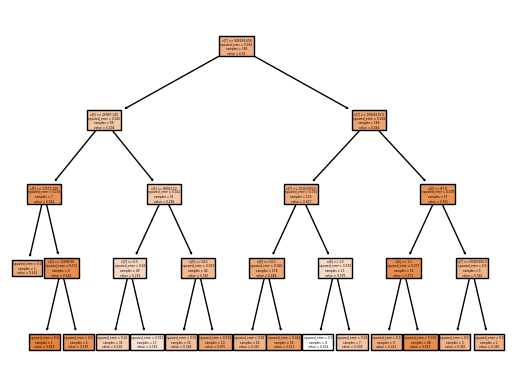

In [19]:
# Pintamos el árbol para compararlo con la representación gráfica anterior
from sklearn.tree import plot_tree

plot_tree(model_DTR, filled=True)
plt.show()

## Predicción

In [20]:
Y_pred = model_DTR.predict(X_test)

In [21]:
# Error de test del modelo 
# ==============================================================================
rmse_dtr = mean_squared_error(
            y_true  = Y_test,
            y_pred  = Y_pred,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_dtr}")


El error (rmse) de test es: 0.1451881357295441


## Ejemplo de clasificación 

El conjunto de datos contienen transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.

Contiene solo variables de entrada numéricas que son el resultado de una transformación PCA. Desafortunadamente, debido a problemas de confidencialidad, no podemos proporcionar las características originales ni más información general sobre los datos. Las características V1, V2, … V28 son los principales componentes obtenidos con PCA, las únicas características que no han sido transformadas con PCA son 'Tiempo' y 'Cantidad'. La característica 'Tiempo' contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos. La función 'Cantidad' es la cantidad de la transacción, esta función se puede utilizar para el aprendizaje sensible a los costos dependiente del ejemplo. Feature 'Class' es la variable de respuesta y toma valor 1 en caso de fraude y 0 en caso contrario.

In [22]:
dataset = pd.read_csv("creditcard.csv")

## División del conjunto de datos

In [23]:
Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']
validation_size = 0.2
seed = 7
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=validation_size, 
                                                   stratify=dataset["Class"],
                                                   random_state=seed)

## Preparación del conjunto de datos¶

In [25]:
# Instanciamos nuestro transformador personalizado
data_preparer = DataFramePreparer()

In [26]:
# Hacemos el fit con el conjunto de datos general para que adquiera todos los valores posibles
data_preparer.fit(X)

DataFramePreparer()

## Escalado del conjunto de datos

In [27]:
# Transformamos el subconjunto de datos de entrenamiento
X_train_prep = data_preparer.transform(X_train)

In [28]:
# Transformamos el subconjunto de datos de validacion
X_test_prep = data_preparer.transform(X_test)

## Modelo de Árbol de decisión para la clasificación

In [29]:
model_DTC = DecisionTreeClassifier(max_depth=4)
model_DTC.fit(X_train_prep, Y_train)

DecisionTreeClassifier(max_depth=4)

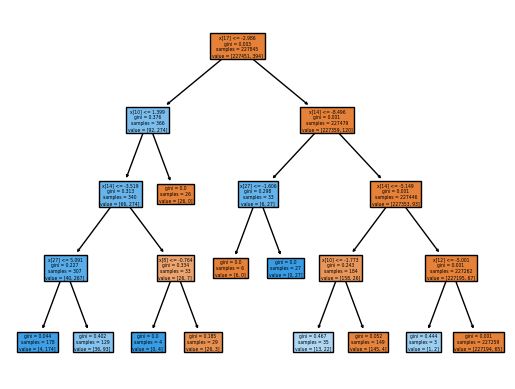

In [30]:
from sklearn.tree import plot_tree

plot_tree(model_DTC, filled=True)
plt.show()

In [31]:
# Accuracy de test del modelo 

Y_pred = model_DTC.predict(X=X_test_prep)
print(accuracy_score(Y_test, Y_pred))

0.9994557775359011
